In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [124]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [126]:
df['fbs']=df['fbs'].astype('object')
df['exang']=df['exang'].astype('object')

In [127]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 92.3+ KB


In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
label_enc = LabelEncoder()

In [131]:
df['sex'] = label_enc.fit_transform(df['sex'])
df['cp'] = label_enc.fit_transform(df['cp'])
df['fbs'] = label_enc.fit_transform(df['fbs'])
df['restecg'] = label_enc.fit_transform(df['restecg'])
#df['exang'] = label_enc.fit_transform(df['exang'])
df['slope'] = label_enc.fit_transform(df['slope'])
df['thal'] = label_enc.fit_transform(df['thal'])

In [132]:
df['exang'] = df['exang'].replace({True:1,False:0,'TURE':1,'FALSE':0})

In [133]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,NaN,0,0,4


In [134]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [149]:
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)

In [147]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,0.5,0,0,4


In [150]:
df.duplicated().sum()

1

In [151]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,0.5,0,0,4


In [152]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.192634,0.217942,-0.054644,0.058691,0.326493
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.187388,0.088802,-0.045065,0.068439,0.259605
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.343597,-0.174732,0.092177,-0.080093,-0.312848
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.151984,0.134945,0.006748,0.056369,0.137251
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.037019,0.032205,0.047292,-0.016943,-0.238813
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.027807,0.008154,-0.026636,-0.017255,0.156268
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.085640,-0.048425,-0.084796,-0.112161,0.036508
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.349191,-0.112624,0.224048,0.006171,-0.323058
exang,0.192634,0.187388,-0.343597,0.151984,-0.037019,0.027807,0.085640,-0.349191,1.000000,0.355955,-0.161810,0.085812,0.359549
oldpeak,0.217942,0.088802,-0.174732,0.134945,0.032205,0.008154,-0.048425,-0.112624,0.355955,1.000000,-0.184311,0.094374,0.406078


<Axes: >

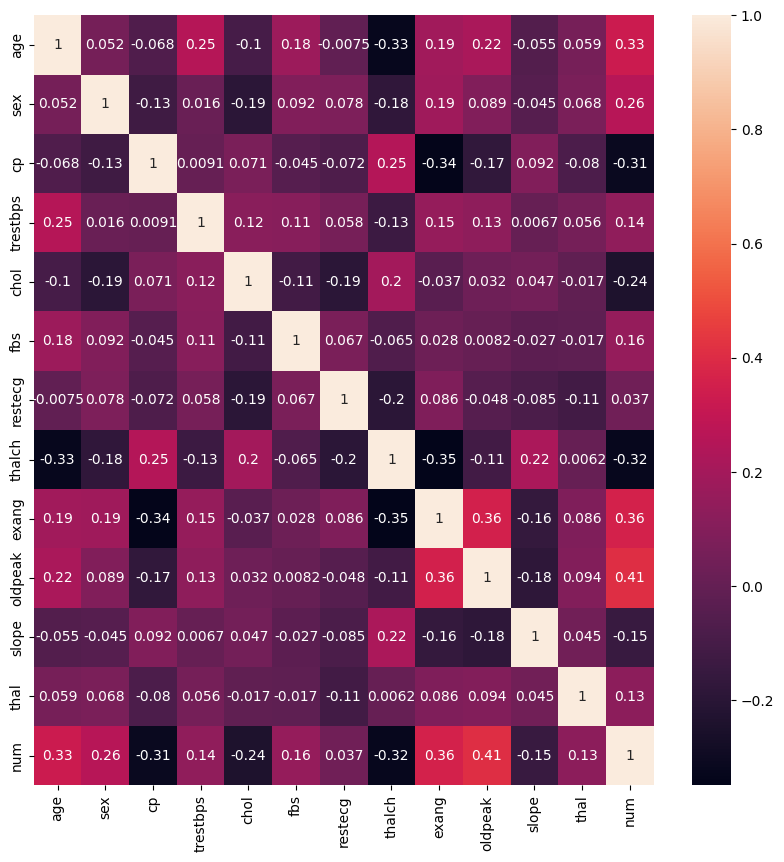

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'thal'}>],
       [<Axes: title={'center': 'num'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

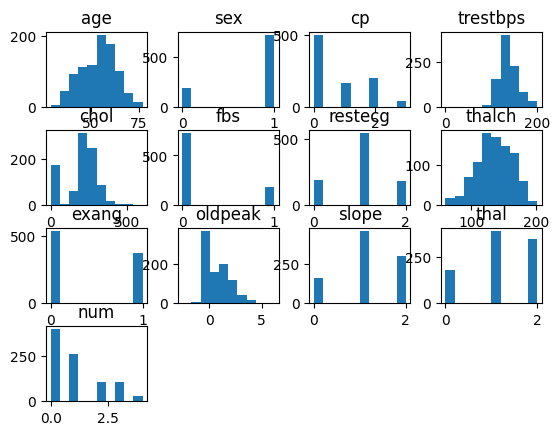

In [155]:
df.hist(grid=False)

In [159]:
features = df.drop('num',axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2
904,62,1,0,166,170,0,2,120,1,3.0,1,2
905,56,1,2,170,0,0,0,123,1,2.5,0,1
906,56,1,2,144,208,1,2,105,1,0.5,0,0


In [162]:
target = df['num']
target

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [163]:
#import the model (DecisionTree)

In [180]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [169]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=100)

In [170]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 12)
(182, 12)
(726,)
(182,)


In [205]:
dectree = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')

In [206]:
dectree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [207]:
ypred = dectree.predict(x_test)

In [208]:
accuracy_score(ypred,y_test)

0.521978021978022

In [209]:
#we achieved 52% of accuracy score 

In [210]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        85
           1       0.37      0.47      0.41        49
           2       0.00      0.00      0.00        21
           3       0.28      0.22      0.24        23
           4       0.00      0.00      0.00         4

    accuracy                           0.52       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.45      0.52      0.48       182



In [191]:
#we will find correct optimum values from the gridsearch

In [192]:
from sklearn.model_selection import GridSearchCV

In [196]:
params = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6],'splitter':['random','best']}

In [197]:
grid = GridSearchCV(dectree,params)

In [198]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']})

In [199]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [244]:
dectree = DecisionTreeClassifier(criterion='gini',max_depth=3,splitter='random')
dectree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [245]:
ypred1 = dectree.predict(x_test)

In [246]:
accuracy_score(y_test,ypred1)

0.5824175824175825

In [247]:
#we got 58% of the accuracy_score with the gridsearch prams criterion=gini,max_depth=3,splitter=random

In [249]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81        85
           1       0.38      0.63      0.48        49
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         4

    accuracy                           0.58       182
   macro avg       0.23      0.30      0.26       182
weighted avg       0.45      0.58      0.51       182



In [250]:
confusion_matrix(y_test,ypred1)

array([[75, 10,  0,  0,  0],
       [18, 31,  0,  0,  0],
       [ 3, 18,  0,  0,  0],
       [ 3, 20,  0,  0,  0],
       [ 2,  2,  0,  0,  0]], dtype=int64)

<Axes: >

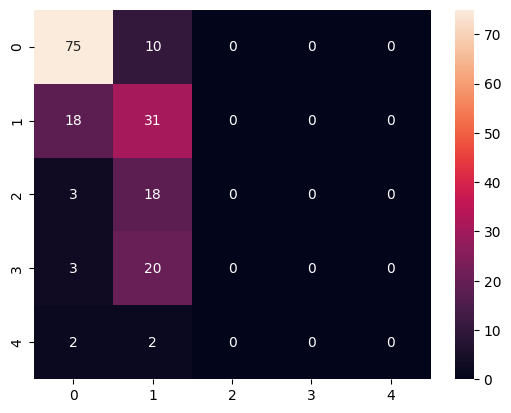

In [251]:
sns.heatmap(confusion_matrix(y_test,ypred1),annot=True)